In [24]:
import ffn
%matplotlib inline
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from datetime import datetime
import pickle
import talib
from talib import MA_Type
import requests

In [25]:
# 讀出預先下載好的股價資料
with open('stockdata', 'rb') as f:
    data = pickle.load(file=f)

In [26]:
data

{'AAPL':                   Open        High         Low       Close   Adj Close  \
 Date                                                                     
 2015-12-31  107.010002  107.029999  104.820000  105.260002  101.339394   
 2016-01-04  102.610001  105.370003  102.000000  105.349998  101.426033   
 2016-01-05  105.750000  105.849998  102.410004  102.709999   98.884369   
 2016-01-06  100.559998  102.370003   99.870003  100.699997   96.949242   
 2016-01-07   98.680000  100.129997   96.430000   96.449997   92.857529   
 2016-01-08   98.550003   99.110001   96.760002   96.959999   93.348541   
 2016-01-11   98.970001   99.059998   97.339996   98.529999   94.860062   
 2016-01-12  100.550003  100.690002   98.839996   99.959999   96.236794   
 2016-01-13  100.320000  101.190002   97.300003   97.389999   93.762527   
 2016-01-14   97.959999  100.480003   95.739998   99.519997   95.813171   
 2016-01-15   96.199997   97.709999   95.360001   97.129997   93.512207   
 2016-01-19   98.

# Q1. 畫出 Diamond Shape

In [5]:
def pyramid(n):
    for i in range(n):
        print(" "*(n-i)+"*"*(i)*2+"*")
    for j in range(n-1):
        print(" "*(j+2)+"*"*(n-j-2)*2+"*")
pyramid(10)

          *
         ***
        *****
       *******
      *********
     ***********
    *************
   ***************
  *****************
 *******************
  *****************
   ***************
    *************
     ***********
      *********
       *******
        *****
         ***
          *


# Q2. 刪除重複性資料

從 symbols01.txt 跟 symbols02.txt 讀入兩組股票代號，合併兩組代號，輸出一份無重複的股票代號到 symbols03.txt。

In [6]:
f = open('symbols01.txt', 'r')
file1=f.readlines()

In [7]:
f = open('symbols02.txt', 'r')
file2=f.readlines()

In [8]:
new = file1 + file2

In [9]:
data = set(new)
data = list(new)
str_convert = ''.join(new)

In [10]:
f = open('symbols03.txt', 'w')
f.write(str_convert)
f.close()

# Q3. 下載台灣上市公司基本資料

寫一個程式從 [http://dts.twse.com.tw/opendata/t187ap03_L.csv](http://dts.twse.com.tw/opendata/t187ap03_L.csv) 下載台灣上市公司基本資料，並輸出成 pandas dataframe。

In [27]:
r = requests.get("http://dts.twse.com.tw/opendata/t187ap03_L.csv")

In [28]:
r.encoding = 'big5'

In [29]:
r.text

'106年12月20日17:30:01公司基本資料,\r\n"公司代號","公司名稱","產業別","住址","營利事業統一編號","董事長","總經理","發言人","發言人職稱","代理發言人",總機電話","成立日期","上市日期","普通股每股面額","實收資本額","私募股數","特別股","編制財務報表類型","股票過戶機構","過戶電話","過戶地址","英文簡稱","英文通訊地址","傳真機號碼","電子郵件信箱","網址" \r\n"1101","台灣水泥股份有限公司","水泥工業","台北市中山北路2段113號","11913502","張安平","李鐘培","黃健強","資深副總經理","蔡立文","(02)2531-7099","19501229","19620209","新台幣                 10.0000元","42465090100","0","0","1","中國信託商業銀行代理部","66365566","台北市重慶南路一段83號5樓","TCC","No.113, Sec.2, Zhongshan N. Rd.,Taipei City 104,Taiwan (R.O.C.)","(02)2531-6529","finance@taiwancement.com","http://www.taiwancement.com",\r\n"1102","亞洲水泥股份有限公司","水泥工業","台北市大安區敦化南路2段207號30、31樓","03244509","徐旭東","李坤炎","周維崑","副總經理","吳玲綾","02-2733-8000","19570321","19620608","新台幣                 10.0000元","33614471980","0","0","1","亞東證券股份有限公司","02-2361-8608","台北市重慶南路一段86號3樓","ACC","30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUTH ROAD,SEC.2,TAIPEI,TAIWAN,R.O.C","02-2378-5191","service@acc.com.tw","www.acc.com.tw",\r\n"1103","嘉新水泥股份有限公司","水泥

In [30]:
company = r.text.split("\r\n")

In [31]:
import io

In [32]:
company = io.StringIO(r.text)

In [33]:
pd.read_csv(company, index_col=False, header=1)

,公司代號,公司名稱,產業別,住址,營利事業統一編號,董事長,總經理,發言人,發言人職稱,代理發言人,...,特別股,編制財務報表類型,股票過戶機構,過戶電話,過戶地址,英文簡稱,英文通訊地址,傳真機號碼,電子郵件信箱,網址
0,1101,台灣水泥股份有限公司,水泥工業,台北市中山北路2段113號,11913502.0,張安平,李鐘培,黃健強,資深副總經理,蔡立文,...,0.0,1.0,中國信託商業銀行代理部,66365566,台北市重慶南路一段83號5樓,TCC,"No.113, Sec.2, Zhongshan N. Rd.,Taipei City 10...",(02)2531-6529,finance@taiwancement.com,http://www.taiwancement.com
1,1102,亞洲水泥股份有限公司,水泥工業,台北市大安區敦化南路2段207號30、31樓,3244509.0,徐旭東,李坤炎,周維崑,副總經理,吳玲綾,...,0.0,1.0,亞東證券股份有限公司,02-2361-8608,台北市重慶南路一段86號3樓,ACC,"30TH FLOOR,TAIPEI METRO TOWER,207.TUN HWA SOUT...",02-2378-5191,service@acc.com.tw,www.acc.com.tw
2,1103,嘉新水泥股份有限公司,水泥工業,台北市中山北路2段96號,11892801.0,張剛綸,祁士鉅,王立心,執行副總經理,余曉芸,...,0.0,1.0,群益金鼎證券股份有限公司股代部,(02)2702-3999,台北市敦化南路2段97號地下2樓,CHC,"No.96, Sec. 2, Zhongshan N. Rd., Zhongshan Dis...",(02)2511-4002,investor-relations@chcgroup.com.tw,www.chcgroup.com.tw
3,1104,環球水泥股份有限公司,水泥工業,台北市南京東路二段125號10樓,7568009.0,侯博義,侯博義,楊宗仁,經理,詹志鴻,...,0.0,1.0,凱基證券股份有限公司股務代理部,02-23892999,﹝100﹞台北市重慶南路一段2號5樓,UCC,"10th F1., 125 Nanking E.Rd Sec. 2,Taipei Taiwan",02-25075870,ucc@ucctw.com,www.ucctw.com
4,1108,幸福水泥股份有限公司,水泥工業,台北市松江路237號15樓,40601248.0,陳兩傳,陳兩傳,溫秀菊,財務部經理,陳一誠,...,0.0,1.0,永豐金證券股務代理,2381-6288,台北市中正區博愛路17號3樓,LUCKY CEMENT,"15TH FL.,NO.237,SUNG KIANG RD.,TAIPEI,TAIWAN,R...",25048672,"wendy@luckygrp,com.tw",www.luckygrp.com.tw
5,1109,信大水泥股份有限公司,水泥工業,台北市寶慶路37號7樓,3279507.0,楊智雄,楊智雄,吳連富,副總經理,林坤榮,...,0.0,1.0,中國信託商業銀行代理部,(02)6636-5566,台北巿重慶南路一段83號5樓,HsingTa,"7TH FL.,No.37 Pao Ching RoadTaipei Taiwan R.O.C.",23314086,service@hsingta.com.tw,www.hsingta.com.tw
6,1110,東南水泥股份有限公司,水泥工業,高雄市前金區五福三路21號4樓之1,83078600.0,陳敏斷,吳長直,黃薪翰,財務部經理,唐榮宗,...,0.0,1.0,元大證券股份有限公司,02-25865859,台北市承德路三段210號地下室1樓,TUNA CEMENT,"NO.21 Wu Fu 3 RoadKaohsiung, Taiwan, R.O.C.",07-9505895,southeast@secement.com,www.southeastcement.com.tw
7,1201,味全食品工業股份有限公司,食品工業,台北市松江路125號,11347802.0,陳永清,蘇守斌,張美凰,財務長,─,...,0.0,1.0,元大證券股務代理部,(02)25865859,台北市大同區承德路3段210號地下一樓,Wei Chuan,"10F., No.125, Sung Chiang Rd.Taipei, Taiwan(R....",(02)25063182,service@weichuan.com.tw,http://www.weichuan.com.tw
8,1203,味王股份有限公司,食品工業,台北市中山北路二段79號5樓,7067309.0,陳清福,陳恭平,魏璟雄,經理,李兆弘,...,0.0,1.0,群益金鼎證券股份有限公司,27023999,台北市敦化南路二段97號地下2樓,VE WONG,"5TH FL., 79 CHUNG SHAN N. RD., SEC.2TAIPEI TAIWAN",(02)25811006,wei@vewong.com.tw,http://www.vewong.com
9,1210,大成長城企業股份有限公司,食品工業,台南市永康區蔦松二街三號,73008303.0,韓家宇,莊坤炎,周叔恆,特助,常岡德,...,0.0,1.0,中國信託商業銀行代理部,02-66365566,台北市重慶南路一段八十三號六樓,GREATWALL,3 NIAOSUN 2TH STREETYONGKONG TAINAN CONTY TAIWAN,06-2534596,john@greatwall-group.com,http://www.dachan.com


# Q4. 畫出技術曲線

請畫出除了上課提過的線型之外的任何技術曲線，並寫註解說明。

In [20]:
data.keys()

dict_keys(['TICC', 'TWIN', 'AMOT', 'CDZI', 'GOOG', 'TBNK', 'RICK', 'UTMD', 'YTRA', 'CSML', 'NLNK', 'BLCM', 'CZNC', 'GERN', 'CDXS', 'TTPH', 'SCAC', 'HBCP', 'LCA', 'BBGI', 'TCRD', 'TSLA', 'ISRL', 'BELFB', 'PSC', 'NKSH', 'VRA', 'NEWT', 'AAPL', 'DFRG'])

In [21]:
df = data['TSLA']

In [22]:
# 計算均線
df['20d'] = pd.Series.rolling(df['Close'], window=20).mean()
df['60d'] = pd.Series.rolling(df['Close'], window=60).mean()

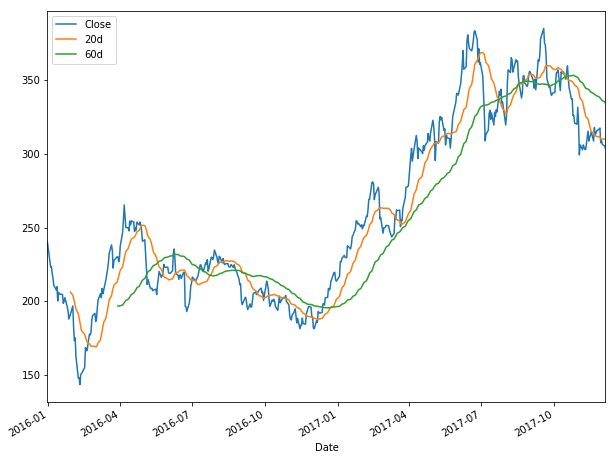

In [8]:
df[['Close', '20d', '60d']].plot(legend='best', figsize=(10,8))

In [12]:
df['MA5'] = talib.MA(df['Close'].values, timeperiod=5) #計算五日均線

In [30]:
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,20d,60d,MA5
Date,,,,,,,,,
2017-11-21,310.859985,318.230011,308.709991,317.809998,317.809998,7261300,312.980997,340.528999,313.079993
2017-11-22,316.769989,317.420013,311.839996,312.600006,312.600006,4917600,312.318997,339.949666,313.339996
2017-11-24,313.790009,316.410004,311.000000,315.549988,315.549988,3244100,311.787996,339.322499,313.949994
2017-11-27,313.250000,317.339996,309.510010,316.809998,316.809998,4555900,311.584996,338.670999,314.301996
2017-11-28,316.359985,320.000000,313.920013,317.549988,317.549988,4949500,311.458496,338.040166,316.063996
2017-11-29,317.299988,318.000000,301.230011,307.540009,307.540009,8767400,310.258997,337.339333,314.009998
2017-11-30,308.559998,310.700012,304.540009,308.850006,308.850006,4351600,309.647498,336.744666,313.259998
2017-12-01,305.440002,310.320007,305.049988,306.529999,306.529999,4292900,310.010997,336.010000,311.456000
2017-12-04,306.500000,308.269989,300.609985,305.200012,305.200012,5835100,309.966498,335.373333,309.134003


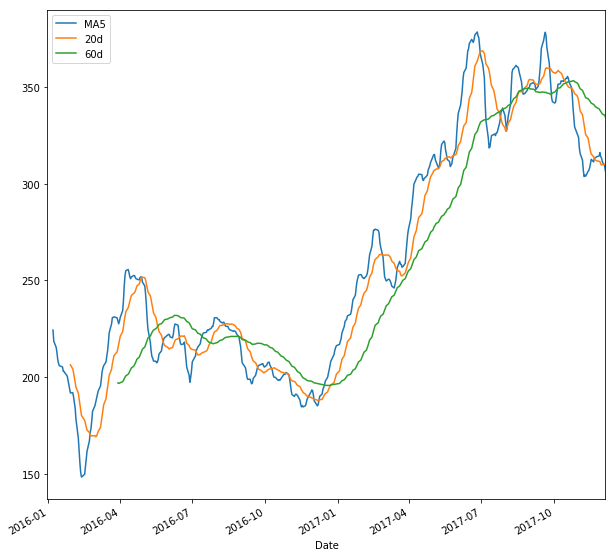

In [48]:
df[['MA5', '20d', '60d']].plot(legend='best', figsize=(10,10))

In [33]:
df['ATR'] = talib.ATR(df['High'].values, df['Low'].values, df['Close'].values, timeperiod=14) #Average True Range
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,20d,60d,MA5,ATR
Date,,,,,,,,,,
2017-11-21,310.859985,318.230011,308.709991,317.809998,317.809998,7261300,312.980997,340.528999,313.079993,10.403986
2017-11-22,316.769989,317.420013,311.839996,312.600006,312.600006,4917600,312.318997,339.949666,313.339996,10.087272
2017-11-24,313.790009,316.410004,311.000000,315.549988,315.549988,3244100,311.787996,339.322499,313.949994,9.753182
2017-11-27,313.250000,317.339996,309.510010,316.809998,316.809998,4555900,311.584996,338.670999,314.301996,9.615811
2017-11-28,316.359985,320.000000,313.920013,317.549988,317.549988,4949500,311.458496,338.040166,316.063996,9.363252
2017-11-29,317.299988,318.000000,301.230011,307.540009,307.540009,8767400,310.258997,337.339333,314.009998,9.892305
2017-11-30,308.559998,310.700012,304.540009,308.850006,308.850006,4351600,309.647498,336.744666,313.259998,9.625712
2017-12-01,305.440002,310.320007,305.049988,306.529999,306.529999,4292900,310.010997,336.010000,311.456000,9.314591
2017-12-04,306.500000,308.269989,300.609985,305.200012,305.200012,5835100,309.966498,335.373333,309.134003,9.196406


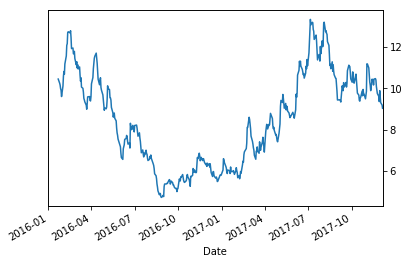

In [39]:
df['ATR'].plot(secondary_y=True)

In [44]:
df['SUM'] = talib.SUM(df['Close'].values, timeperiod=30) #Summation
df.tail(10)

,Open,High,Low,Close,Adj Close,Volume,20d,60d,MA5,ATR,SUM
Date,,,,,,,,,,,
2017-11-21,310.859985,318.230011,308.709991,317.809998,317.809998,7261300,312.980997,340.528999,313.079993,10.403986,9762.739930
2017-11-22,316.769989,317.420013,311.839996,312.600006,312.600006,4917600,312.318997,339.949666,313.339996,10.087272,9720.739930
2017-11-24,313.790009,316.410004,311.000000,315.549988,315.549988,3244100,311.787996,339.322499,313.949994,9.753182,9680.609925
2017-11-27,313.250000,317.339996,309.510010,316.809998,316.809998,4555900,311.584996,338.670999,314.301996,9.615811,9641.849916
2017-11-28,316.359985,320.000000,313.920013,317.549988,317.549988,4949500,311.458496,338.040166,316.063996,9.363252,9608.799898
2017-11-29,317.299988,318.000000,301.230011,307.540009,307.540009,8767400,310.258997,337.339333,314.009998,9.892305,9560.589907
2017-11-30,308.559998,310.700012,304.540009,308.850006,308.850006,4351600,309.647498,336.744666,313.259998,9.625712,9509.789919
2017-12-01,305.440002,310.320007,305.049988,306.529999,306.529999,4292900,310.010997,336.010000,311.456000,9.314591,9464.509920
2017-12-04,306.500000,308.269989,300.609985,305.200012,305.200012,5835100,309.966498,335.373333,309.134003,9.196406,9424.609926


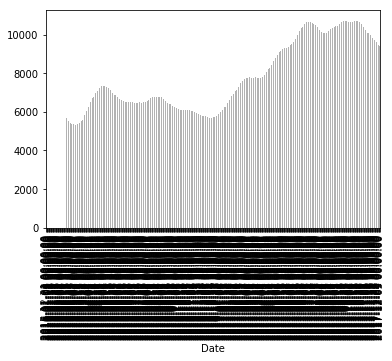

In [99]:
df['SUM'].plot(kind='bar', color='k', alpha=0.3)

In [103]:
# 用talib計算6日指数移动平均線的值
df['EMA12'] = talib.EMA(df['Close'].values, timeperiod=6)  
df['EMA26'] = talib.EMA(df['Close'].values, timeperiod=12)   
 # 用talib計算MACD指標
df['MACD'],df['MACDsignal'],df['MACDhist'] = talib.MACD(df['Close'].values, fastperiod=6, slowperiod=12, signalperiod=9)   
df.tail(12)

,Open,High,Low,Close,Adj Close,Volume,20d,60d,MA5,ATR,SUM,EMA12,EMA26,MACD,MACDsignal,MACDhist
Date,,,,,,,,,,,,,,,,
2017-11-17,325.670013,326.670013,313.149994,315.049988,315.049988,13735100,315.371497,341.648332,312.589996,10.450597,9834.719940,311.624037,312.728202,-1.104165,-4.131419,3.027254
2017-11-20,313.790009,315.500000,304.750000,308.739990,308.739990,8247700,313.957497,340.993166,311.257996,10.471983,9800.519928,310.800024,312.114631,-1.314607,-3.568057,2.253449
2017-11-21,310.859985,318.230011,308.709991,317.809998,317.809998,7261300,312.980997,340.528999,313.079993,10.403986,9762.739930,312.802874,312.990841,-0.187968,-2.892039,2.704071
2017-11-22,316.769989,317.420013,311.839996,312.600006,312.600006,4917600,312.318997,339.949666,313.339996,10.087272,9720.739930,312.744911,312.930713,-0.185801,-2.350791,2.164990
2017-11-24,313.790009,316.410004,311.000000,315.549988,315.549988,3244100,311.787996,339.322499,313.949994,9.753182,9680.609925,313.546362,313.333678,0.212684,-1.838096,2.050780
2017-11-27,313.250000,317.339996,309.510010,316.809998,316.809998,4555900,311.584996,338.670999,314.301996,9.615811,9641.849916,314.478829,313.868497,0.610333,-1.348411,1.958743
2017-11-28,316.359985,320.000000,313.920013,317.549988,317.549988,4949500,311.458496,338.040166,316.063996,9.363252,9608.799898,315.356303,314.434880,0.921423,-0.894444,1.815867
2017-11-29,317.299988,318.000000,301.230011,307.540009,307.540009,8767400,310.258997,337.339333,314.009998,9.892305,9560.589907,313.123076,313.374131,-0.251054,-0.765766,0.514712
2017-11-30,308.559998,310.700012,304.540009,308.850006,308.850006,4351600,309.647498,336.744666,313.259998,9.625712,9509.789919,311.902199,312.678111,-0.775912,-0.767795,-0.008117


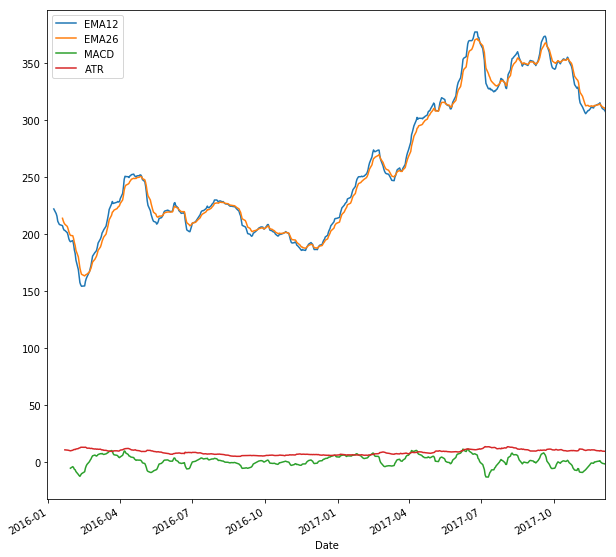

In [105]:
df[['EMA12', 'EMA26', 'MACD', 'ATR']].plot(legend='best', figsize=(10,10))

# Q5. 策略回測

In [134]:
# 計算 MaxDD
def DrawDownAnalysis(cumRet):
    dd_series = ffn.core.to_drawdown_series(cumRet)
    dd_details = ffn.core.drawdown_details(dd_series)
    return dd_details['drawdown'].min(), dd_details['days'].max()

In [135]:
# 利用策略產生的持有部位資訊，計算底下四個指標來判斷投資績效
# sharpe ratio: 判斷報酬的好壞跟穩定度，數值越大越好
# maxdd: maximum drawdown, 最糟糕的狀況會賠幾 %
# maxddd: maximum drawdown duration, 低於上一次最高報酬的天數
# cumRet[-1]: 最後賺的 % 數

def indicators(df):
    dailyRet = df['Close'].pct_change()
    excessRet = (dailyRet - 0.04/252)[df['positions'] == 1]
    SharpeRatio = np.sqrt(252.0)*np.mean(excessRet)/np.std(excessRet)
    
    cumRet = np.cumprod(1+excessRet)
    
    maxdd, maxddd = DrawDownAnalysis(cumRet)
    
    return SharpeRatio, maxdd, maxddd, cumRet[-1]

In [38]:
# 這是我們的策略的部分
# 主要只是要算出進出的訊號 signals 跟何時持有部位 positions
# 底下是一個突破系統的範例

def Breakout_strategy(df):
    # Donchian Channel
    df['20d_high'] = np.round(pd.Series.rolling(df['Close'], window=20).max(), 2)
    df['10d_low'] = np.round(pd.Series.rolling(df['Close'], window=10).min(), 2)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] > df['20d_high'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] < df['10d_low'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [39]:
def RSI_7030_strategy(df):
    df['RSI'] = talib.RSI(df['Close'].values)
    
    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['RSI'][t-1] < 30:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['RSI'][t-1] > 70:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [40]:
def BBands_strategy(df):
    df['UBB'], df['MBB'], df['LBB'] = talib.BBANDS(df['Close'].values, matype=MA_Type.T3)

    has_position = False
    df['signals'] = 0
    for t in range(2, df['signals'].size):
        if df['Close'][t] < df['LBB'][t-1]:
            if not has_position:
                df.loc[df.index[t], 'signals'] = 1
                has_position = True
        elif df['Close'][t] > df['UBB'][t-1]:
            if has_position:
                df.loc[df.index[t], 'signals'] = -1
                has_position = False

    df['positions'] = df['signals'].cumsum().shift()
    return df

In [44]:
# 定義你的策略
def N064030014_strategy(df):
    df['slowK'], df["slowD"] = talib.STOCHF(df["High"].values, df["Low"].values, df['Close'].values, fastk_period=9,  
                                   slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
     
    has_position = False
    df['signals'] = 0
    
    # TODO
    
    #獲取最近的kd值
    slowk = df['slowK'][-1]
    slowd = df["slowD"][-1]
    
    current_price = df['Close'].values
    
    #slowK > 90 or slowD > 90，賣出所有股票
    if slowk > 90 or slowd > 90 :
             order_target_percent(stock, 0)
    
    #slowK < 10 or slowD < 10，全入所有股票
    elif slowk < 10 or slowd < 10 :
            number_of_shares = int(cash/current_price)
            
            if number_of_shares > 0:
                order_shares(stock, number_of_shares)
                
    df['positions'] = df['signals'].cumsum().shift()
    return df

In [45]:
def apply_strategy(strategy, df):
    return strategy(df)

In [46]:
# 計算各支股票的回測結果
results = []

#strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, N064030014_strategy]
strategies = [Breakout_strategy, RSI_7030_strategy, BBands_strategy, N064030014_strategy]

for symbol in data:
    for strategy in strategies:
        try:
            apply_strategy(strategy, data[symbol])
            if np.all(data[symbol]['signals']==0):
                print("Symbol:", symbol, "使用", strategy.__name__, "策略沒有出現買賣訊號。")
                continue
            SharpeRatio, maxdd, maxddd, finalRet = indicators(data[symbol])
            days = (data[symbol].index[-1] - data[symbol].index[0]).days
            results.append((SharpeRatio, maxdd, maxddd, finalRet, days,
                            data[symbol][data[symbol]['signals'] > 0]['signals'].sum(), symbol, strategy.__name__))
        except Exception as e:
            print("Error occurs at symbol:", symbol, "Strategy:", strategy.__name__, "==>", e.args)

Error occurs at symbol: TICC Strategy: Breakout_strategy ==> ("name 'indicators' is not defined",)
Error occurs at symbol: TICC Strategy: RSI_7030_strategy ==> ("name 'indicators' is not defined",)
Error occurs at symbol: TICC Strategy: BBands_strategy ==> ("name 'indicators' is not defined",)
Error occurs at symbol: TICC Strategy: N064030014_strategy ==> ("STOCHF() got an unexpected keyword argument 'slowk_period'",)
Error occurs at symbol: TWIN Strategy: Breakout_strategy ==> ("name 'indicators' is not defined",)
Error occurs at symbol: TWIN Strategy: RSI_7030_strategy ==> ("name 'indicators' is not defined",)
Error occurs at symbol: TWIN Strategy: BBands_strategy ==> ("name 'indicators' is not defined",)
Error occurs at symbol: TWIN Strategy: N064030014_strategy ==> ("STOCHF() got an unexpected keyword argument 'slowk_period'",)
Error occurs at symbol: AMOT Strategy: Breakout_strategy ==> ("name 'indicators' is not defined",)
Error occurs at symbol: AMOT Strategy: RSI_7030_strategy 

In [142]:
results_df = pd.DataFrame(results, columns=['sharpe','MaxDrawDown','MaxDrawDownDuration','returns', 
                                            'days', 'entries','symbol','strategy'])

In [143]:
results_df.head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
0,0.131503,-0.208296,281,0.995734,705,11,TICC,Breakout_strategy
1,0.395515,-0.244817,482,1.077756,705,2,TICC,RSI_7030_strategy
2,0.102787,-0.231763,426,0.984521,705,20,TICC,BBands_strategy
3,1.365570,-0.361485,299,1.631388,705,12,TWIN,Breakout_strategy
4,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy


In [144]:
results_df.sort_values('MaxDrawDown',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
55,6.306176,-0.003654,122,1.028222,473,3,LCA,RSI_7030_strategy
13,10.243474,-0.006251,3,1.132402,705,1,GOOG,RSI_7030_strategy
56,2.038551,-0.013673,119,1.060527,473,16,LCA,BBands_strategy
50,1.085572,-0.023454,135,1.049505,384,12,SCAC,BBands_strategy
27,3.040178,-0.023844,58,1.073352,203,3,CSML,Breakout_strategy


In [145]:
results_df.sort_values('returns',ascending=False).head()

,sharpe,MaxDrawDown,MaxDrawDownDuration,returns,days,entries,symbol,strategy
7,2.013777,-0.219296,167,2.477803,705,4,AMOT,RSI_7030_strategy
11,2.062962,-0.286661,113,2.422460,705,22,CDZI,BBands_strategy
59,2.136744,-0.454342,191,2.400221,705,21,BBGI,BBands_strategy
4,2.424484,-0.169115,115,2.151881,705,3,TWIN,RSI_7030_strategy
68,1.724711,-0.231083,481,1.717758,704,20,ISRL,BBands_strategy
